In [20]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


step = 5
x = np.arange(0, 300, step)
y = np.arange(0, 300, step)
X, Y = np.meshgrid(x, y)

f = 100 * X**(3/4) * Y**(1/4)
g = 200*X + 250*Y - 50000

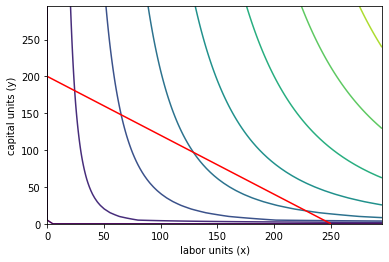

In [24]:
fig, ax = plt.subplots()
ax.contour(X, Y, f)
ax.contour(X, Y, g, [0], colors=["red"])
plt.xlabel('labor units (x)')
plt.ylabel('capital units (y)')
plt.show()

In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [93]:
def f(x1, x2):
    val = 5*x1**2 + x2**2 + 4*x1*x2 - 14*x1 - 6*x2 + 20
    
    return val

def gradient(x1, x2):
    partial_x1 = 10*x1 + 4*x2 - 14
    partial_x2 = 2*x2 + 4*x1 - 6
    
    return np.array([partial_x1, partial_x2])

def diff_h(alpha):
    gradient_x1 = gradient(x1, x2)[0]
    gradient_x2 = gradient(x2, x2)[0]
    descent = -gradient(x1, x2)
    
    new_gradient_x1 = (gradient(x1 + alpha*descent[0], x2 + alpha*descent[1])[0]) * descent[0]
    new_gradient_x2 = (gradient(x1 + alpha*descent[0], x2 + alpha*descent[1])[0]) * descent[1]
    
    return gradient_x1 * new_gradient_x1 + gradient_x2 * new_gradient_x2

def bi_search(x1, x2, eps=1e-4):
    alpha_low = 0
    alpha_hi = 5
    alpha = (alpha_low + alpha_hi) / 2
    
    while abs(diff_h(alpha)) > eps:
        if diff_h(alpha) > 0:
            alpha_hi = alpha
        else:
            alpha_low = alpha
            
        alpha = (alpha_low + alpha_hi) / 2
        
    return alpha

In [94]:
def f_rosenbrock(x, y):
    val = (1 - x)**2 + 100*(y - x**2)**2
    
    return val

def gradient_rosenbrock(x, y):
    partial_x = 2 * (200*x**3 - 200*x*y + x - 1)
    partial_y = 200 * (y - x**2)
    
    return np.array([partial_x, partial_y])

def hessian_rosenbrock(x, y):
    partial_xx = -400*(y - x**2) + 800*x**2 + 2
    partial_xy = -400*x
    partial_yx = -400*x
    partial_yy = 200
    
    return np.array([partial_xx, partial_xy, partial_yx, partial_yy]).reshape(2, 2)

In [251]:
def grad_desc(x_start, f, gradient, alpha=0.01, line_search=None, eps=1e-5, max_iter=10000):
    x_cur = x_start
    history_x = [np.array(x_cur)]
    history_f = [f(*x_start)]

    for i in range(max_iter):
        descent = -gradient(*x_cur)
        if line_search is not None:
            alpha = alpha * line_search(*x_cur)

        x_cur += alpha * descent
        f_cur = f(*x_cur)

        history_x.append(deepcopy(x_cur))
        history_f.append(f_cur)
    
        if history_f[-2] - history_f[-1] < eps:
            break
            
    return history_x, history_f

def newton_desc(x_start, f, gradient, hessian, alpha=0.01, line_search=None, eps=1e-5, max_iter=10000):
    x_cur = x_start
    history_x = [np.array(x_cur)]
    history_f = [f(*x_start)]

    for i in range(max_iter):
        d = np.dot(-np.linalg.inv(hessian(*x_start)), gradient(*x_start))
        
        if np.count_nonzero(d) == 0:
            break
            
        x_cur += alpha * d
        f_cur = f(*x_cur)

        history_x.append(deepcopy(x_cur))
        history_f.append(f_cur)
        
        if history_f[-2] - history_f[-1] < eps:
            break
        
    return history_x, history_f

## Newton method

In [291]:
history_x, history_f = newton_desc([5, 10], f_rosenbrock, gradient_rosenbrock, hessian_rosenbrock, alpha=0.001)

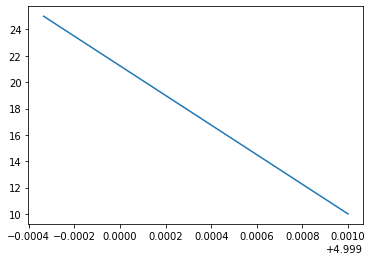

In [292]:
x1 = np.array(history_x)[:, 0]
x2 = np.array(history_x)[:, 1]
plt.plot(x1, x2)
plt.show()

[ 4.99866578 25.00165778]


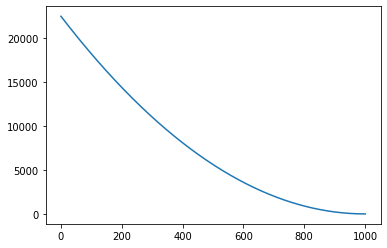

In [293]:
print(history_x[-1])
plt.plot(range(len(history_f)), history_f)
plt.show()

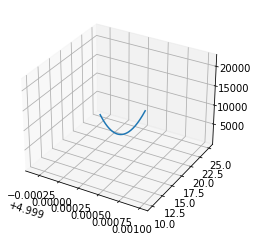

In [294]:
ax = plt.axes(projection='3d')
ax.plot3D(x1.tolist(), x2.tolist(), history_f)
plt.show()

In [295]:
print(history_x[-1])

[ 4.99866578 25.00165778]


In [296]:
history_f[-1]

16.011822664618556

## Gradient descent

In [277]:
history_x, history_f = grad_desc([5, 10], f_rosenbrock, gradient_rosenbrock, alpha=0.0001)

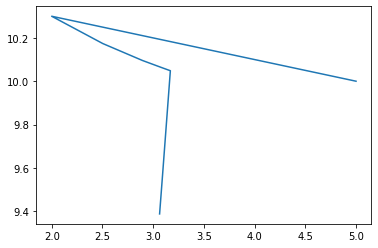

In [278]:
x1 = np.array(history_x)[:, 0]
x2 = np.array(history_x)[:, 1]
plt.plot(x1, x2)
plt.show()

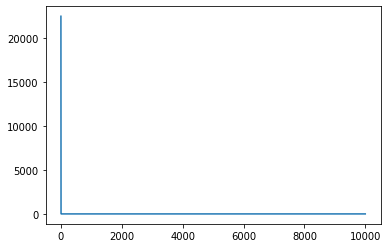

In [279]:
val = np.array(history_f)
plt.plot(range(len(val)), val)
plt.show()

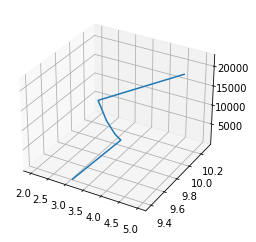

In [280]:
ax = plt.axes(projection='3d')
ax.plot3D(x1.tolist(), x2.tolist(), history_f)
plt.show()

In [281]:
print(history_x[-1])

[3.0633228  9.38722697]


In [283]:
history_f[-1]

4.258377073627772